# Titer substitution model sites per timepoint

Inspect the sites associated with antigenic drift as identified by the titer substitution model over time. Since we evaluate this model iteratively at different timepoints, can we see any change in the patterns of which antigenic sites appear? Is it always the same sites? Do the sites alternate with season? Do the sites change randomly?

In [22]:
from collections import defaultdict
import json
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [23]:
plt.style.use("huddlej")

In [2]:
pwd

'/Users/jlhudd/projects/nextstrain/flu-forecasting/analyses'

## Load data

In [3]:
titer_jsons_template = "../results/builds/h3n2/5_viruses_per_month/sample_0/2005-10-01--2015-10-01/timepoints/{timepoint}/segments/ha/titers-sub-model.json"
timepoints = [
    '2009-10-01',
    '2010-04-01',
    '2010-10-01',
    '2011-04-01',
    '2011-10-01',
    '2012-04-01',
    '2012-10-01'
]

In [4]:
# Load titer results by timepoint.
substititions_by_timepoint = {}
for timepoint in timepoints:
    with open(titer_jsons_template.format(timepoint=timepoint), "r") as fh:
        timepoint_json = json.load(fh)
        substititions_by_timepoint[timepoint] = timepoint_json["substitution"]

## Parse out antigenic sites by timepoint

Convert gene-specific coordinates (SigPep, HA1, and HA2) to global HA coordinates and inspect these sites per timepoint.

In [5]:
# Define amino acid offset in global HA coordinates for internal gene coordinates.
offset_by_gene = {
    "SigPep": 0,
    "HA1": 16,
    "HA2": 345
}

In [6]:
sites_by_timepoint = defaultdict(set)
for timepoint, substitutions in substititions_by_timepoint.items():
    for mut in substitutions.keys():
        gene, gene_mut = mut.split(":")
        mut_site = int(gene_mut[1:-1])
        sites_by_timepoint[timepoint].add(mut_site + offset_by_gene[gene])

In [7]:
sites_by_timepoint["2009-10-01"]

{14,
 16,
 19,
 66,
 78,
 94,
 128,
 154,
 156,
 174,
 189,
 202,
 209,
 230,
 277,
 390,
 429,
 466,
 503}

## Visualize sites by timepoint

Create a heatmap of sites by timepoint across the entire HA protein. Use a simple binary heatmap with sites along the x-axis and time along the y-axis.

In [8]:
# Build an array of arrays where each inner array represents an HA site and the outer arrays are timepoints.
site_matrix = []
for timepoint, sites in sites_by_timepoint.items():
    site_matrix.append(np.array([int(i in sites) for i in range(1, 567)]))

site_matrix = np.array(site_matrix)

[Text(0,0,'2009-10-01'),
 Text(0,0,'2010-04-01'),
 Text(0,0,'2010-10-01'),
 Text(0,0,'2011-04-01'),
 Text(0,0,'2011-10-01'),
 Text(0,0,'2012-04-01'),
 Text(0,0,'2012-10-01')]

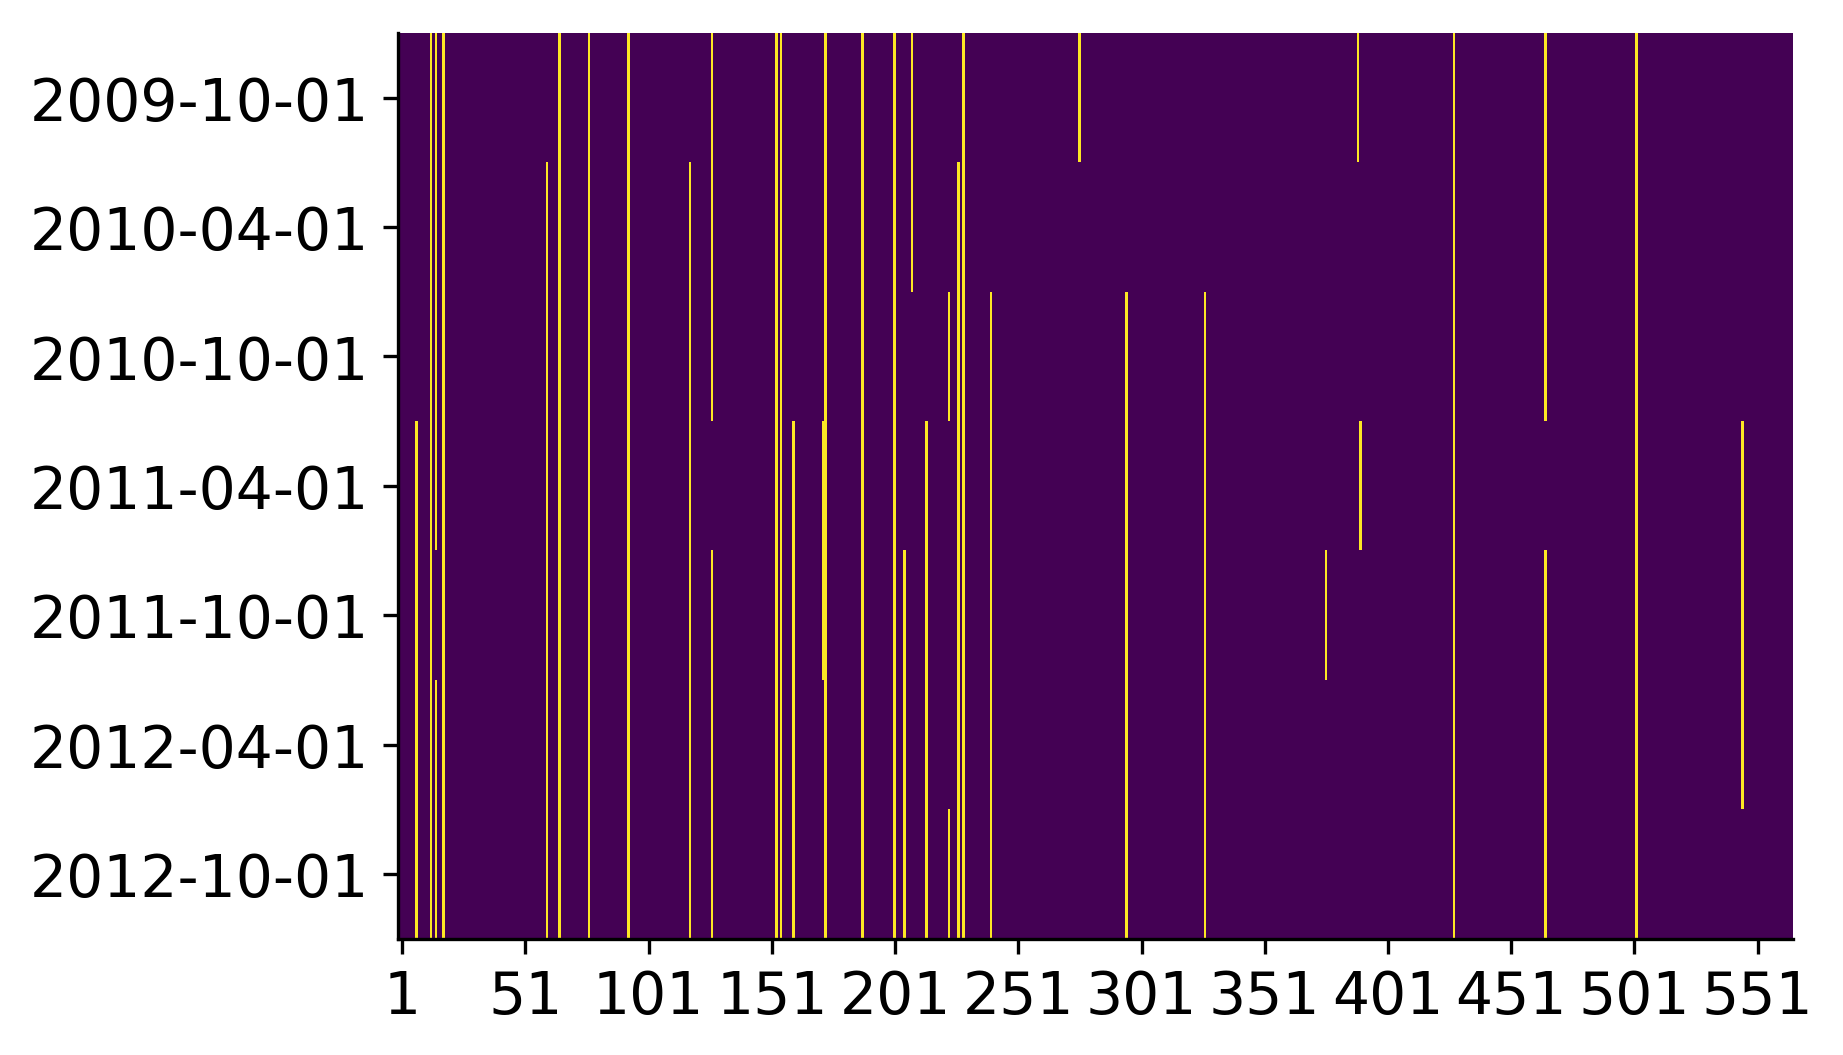

In [24]:
fig, ax = plt.subplots()
im = ax.imshow(site_matrix, aspect="auto")

ax.set_xticks(np.arange(1, 567, 50))
ax.set_yticks(np.arange(len(timepoints)))
ax.set_xticklabels(np.arange(1, 567, 50))
ax.set_yticklabels(timepoints)

## Summarize sites by timepoint

Find sites that appear in most timepoints (6 or more) and those that only appear in one timepoint.

In [10]:
hits_per_site = site_matrix.sum(axis=0)

In [11]:
hits_per_site

array([0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 7, 0, 6, 0, 0, 7, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 7,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7,
       0, 7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 7, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 7, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 6, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0,

In [12]:
print("Total sites observed over %i timepoints: %s" % (len(timepoints), len(np.nonzero(hits_per_site)[0])))

Total sites observed over 7 timepoints: 34


In [13]:
print("Sites observed in 6 or more timepoints: ", (hits_per_site > 6).sum())

Sites observed in 6 or more timepoints:  13


In [14]:
print("Sites observed in only one timepoint: ", (hits_per_site == 1).sum())

Sites observed in only one timepoint:  4


Text(0,0.5,'Number of sites')

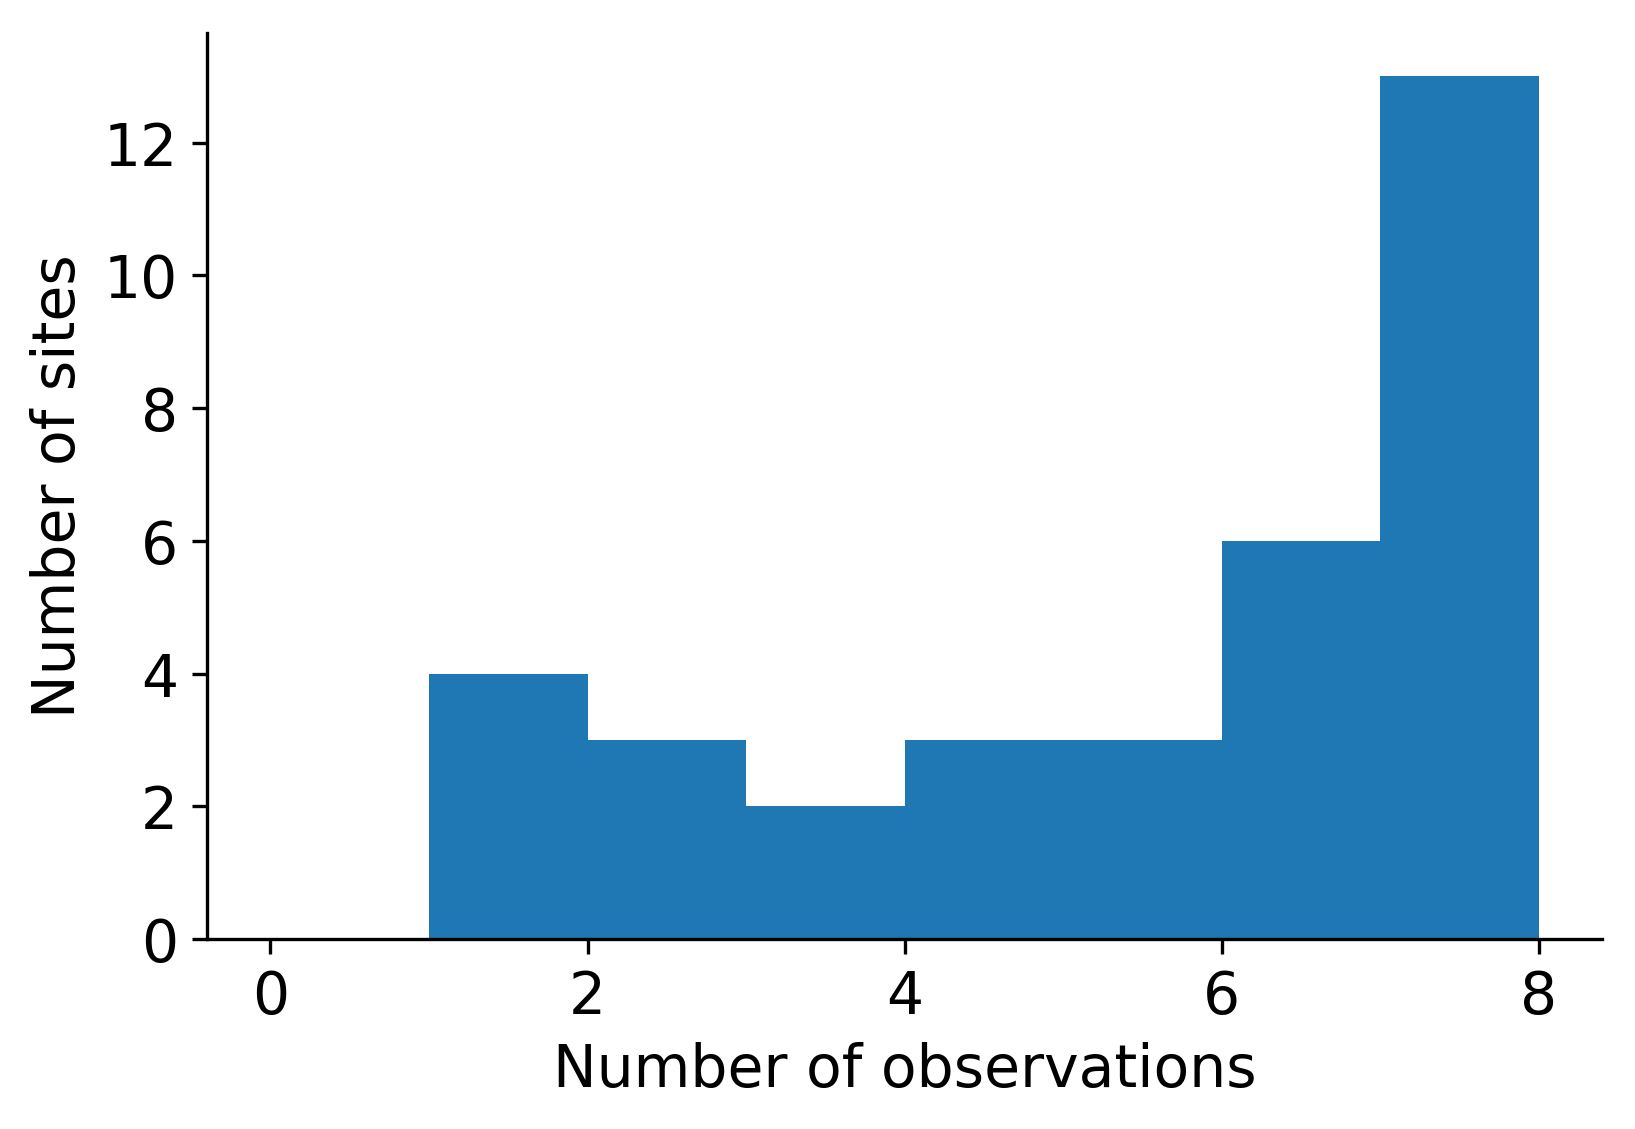

In [25]:
plt.hist(hits_per_site[np.nonzero(hits_per_site)], bins=np.arange(len(timepoints) + 2))
plt.xlabel("Number of observations")
plt.ylabel("Number of sites")

In [50]:
# Find one-based antigenic sites in global HA coordinates.
antigenic_sites = np.argwhere(hits_per_site >= len(timepoints)).flatten() + 1

In [51]:
antigenic_sites

array([ 14,  19,  66,  78,  94, 154, 156, 174, 189, 202, 230, 429, 503])

In [52]:
# Find one-based antigenic sites in HA1 coordinates.
ha1_antigenic_sites = antigenic_sites[(antigenic_sites > 16) & (antigenic_sites <= 345)] - 16

In [53]:
ha1_antigenic_sites

array([  3,  50,  62,  78, 138, 140, 158, 173, 186, 214])

In [54]:
# Define Koel sites in one-based HA1 coordinates.
koel_sites = np.array([145, 155, 156, 158, 159, 189, 193])

In [55]:
# Find shared sites between Koel and titer-identified sites.
np.intersect1d(ha1_antigenic_sites, koel_sites)

array([158])